# Capital Bikeshare Prediction: Data Investigation

**Author**: Matthew Cassi
**Date**: October 4, 2017

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
%matplotlib inline
import seaborn as sb

bikeshare = pd.read_csv('bikeshare_reduced.csv', 
                        parse_dates=['Start date', 'End date', 'start_date_short', 'end_date_short'], 
                        index_col='Start date')
bikeshare.drop('Unnamed: 0', 1, inplace=True)
bikeshare_date_count = bikeshare.copy()
bikeshare_date_count = bikeshare.groupby('start_date_short')['mnth'].count()
bikeshare_count = bikeshare.copy()
bikeshare_count = bikeshare['mnth'].resample('1W').count()

## Capital Bikeshare Explanation


## Project Description


## Questions
After cleaning up the data and joining all of it together the next step was to investigate trends in the number of rides and ride times. 

Questions Asked:
1. Do the number of rides change based on the season? 
    * What about the number of rides based on Member Type?
2. Does the ride time differ based on the different seasons (Winter, Spring, etc.)? 
    * Based on Temperature? 
    * Based on Windspeed? 
    * Based on Humidity? 
    * Based on weather category (sunny, cloudy, rainy, snowy, etc.)?
3. Does the ride time differ based on the different Member Type (Casual rider vs. Registered rider)? 
4. What is the average ride time on holidays vs. non-holidays?
    * Based on weekday?
    * Based on season?
    * Based on month?
    * How are these averages different for member type?
5. What are the most popular starting stations?
6. What are the most popular end stations?
7. What are the most popular start and end station combinations?

Answering these questions will provide further scenarios to investigate and insights as to what might cause ride times to increase between two bikeshare stations. 

## Number of Rides
The number of rides per day for an entire year can show if seasons cause an increase or descrease in ridership. Looking at the graph below on the left, the number of rides decreases when in the fall and winter seasons and increases during the spring and summer seasons. There is a lot of variability, which is difficult to read. The data were resampled based on the using weekly means and plotted. The trends remain the same but are easier to see.

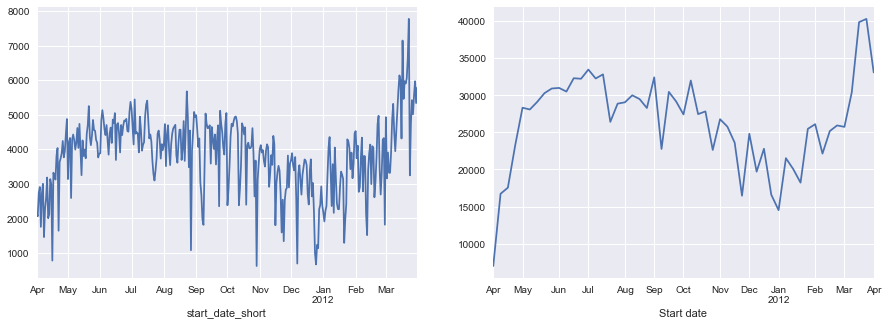

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
bikeshare_date_count.plot()
plt.subplot(1,2,2)
bikeshare_count.plot()
plt.show()

There are 1.4 million rides included in the dataset. What is the breakdown of this by member type? Registered users greatly outnumber the amount of rides compared to casual riders, which is to be expected. 

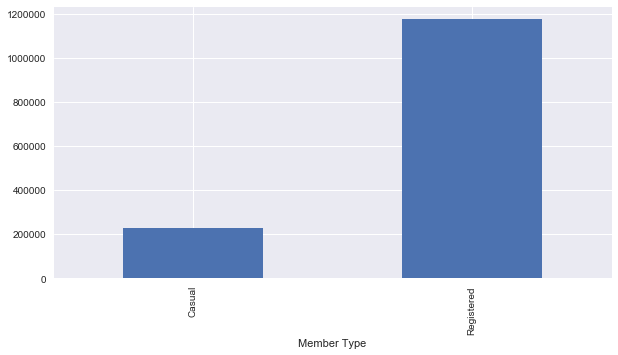

In [15]:
bikeshare_member = bikeshare.groupby('Member Type')['Member Type'].count()
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
bikeshare_member.plot.bar()
plt.subplot(1,2,2)

plt.show()

The trend should be fairly the same when looking at both member types (registered and casual) and number of rides on a daily basis. The graph below shows that the number of rides by registered and casual riders follow the same trends as the full dataset. Each have show a decrease in the fall and winter with an uptick in the spring and summer.

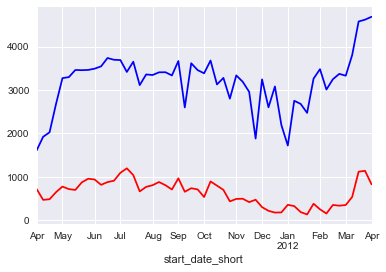

In [18]:
bikeshare_reg = bikeshare[bikeshare['Member Type'] == 'Registered']
bikeshare_cas = bikeshare[bikeshare['Member Type'] == 'Casual']
bikeshare_count_reg = bikeshare_reg.groupby(['start_date_short'])['mnth'].count()
bikeshare_count_cas = bikeshare_cas.groupby(['start_date_short'])['mnth'].count()
bikeshare_count_reg.resample('1W').mean().plot(c='blue')
bikeshare_count_cas.resample('1W').mean().plot(c='red')
plt.show()

Based on the number of rides and the number of rides, one would expect that ride times would be greater in spring and summer compared to the fall and winter. This could be explained by riders deciding to ride to further locations because of more cooperative weather (warmer temperatures, rain vs. snow, etc). It can also be expected that the casual riders would be on bikes longer than registered riders. 

## Ride Times
The mean and median are both important to look at for the ride duration column of the dataset. The median is 11 minutes and the mean is ~13.9 minutes, which means the most rides are fairly quick.

In [26]:
list1 = list(bikeshare['time_diff'].describe().loc[['mean', '50%','min','max']].values)
list2 = ['Mean', 'Median', 'Minimum', 'Maximum']
for s in range(0,4):
    print(list2[s] + ': ' + str(list1[s]))

Mean: 13.8988544024
Median: 11.0
Minimum: 0.0
Maximum: 79.0


The distribution of the duration variable is right skewed meaning the most of the values occur to the left of the plot. The next question to ask is whether the distribution changes with regards to registered and casual riders.

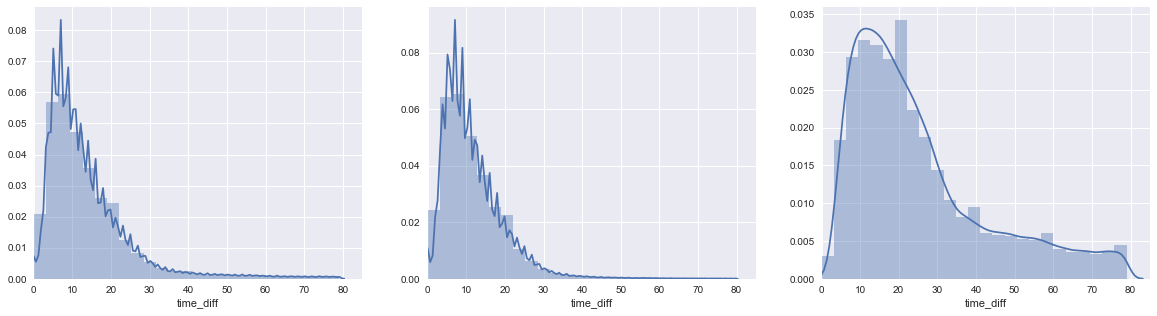

In [29]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
sb.distplot(bikeshare['time_diff'], bins=25)
plt.xlim([0,85])
plt.subplot(1,3,2)
sb.distplot(bikeshare_reg['time_diff'], bins=25)
plt.xlim([0,85])
plt.subplot(1,3,3)
sb.distplot(bikeshare_cas['time_diff'], bins=25)
plt.xlim([0,85])
plt.show()

The distribution of the registered riders is very similar to the overall distribution. The casusal rider distribution is different from the other two distributions. Although the distribution is still right skewed, there is more variability in the data compared to the registered rider and overall distributions. In addition to the differences in distributions, the mean of each is different for each of the datasets (overall, registered, and casual). 
<br>
<br>
Based on the analysis of the number of rides above, the ride time was expected to be shorter when there were less rides (in the fall/winter) and longer when there were more rides (in the spring/summer). The graph on the left shows the data based on daily averages whereas the graph on the right shows the resampled data based on 4 day increments. The average ride duration does decrease in the fall/winter and does increase in the spring/summer.

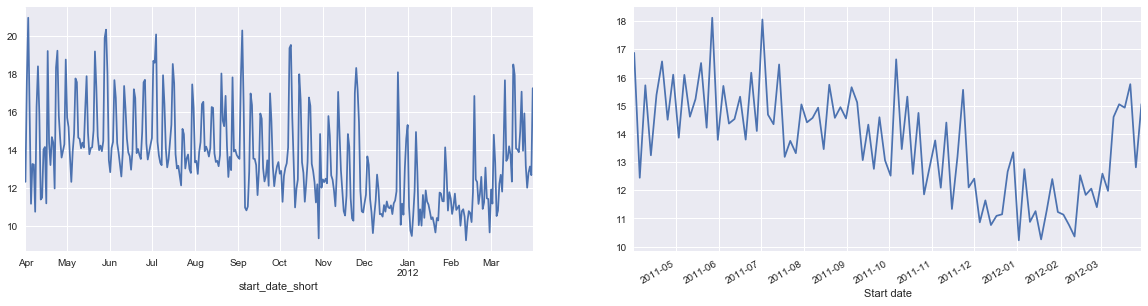

In [31]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
bikeshare_time_avg = bikeshare.groupby('start_date_short')['time_diff'].mean()
bikeshare_time_avg.plot()
plt.subplot(1,2,2)
bikeshare_4d = bikeshare['time_diff'].resample('4D').mean()
bikeshare_4d.plot()
plt.show()

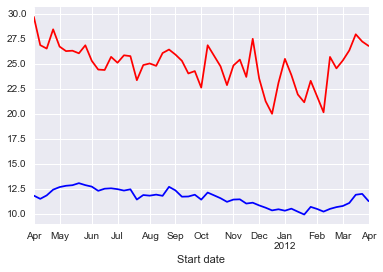

In [32]:
bikeshare_reg['time_diff'].resample('1W').mean().plot(c='blue')
bikeshare_cas['time_diff'].resample('1W').mean().plot(c='red')
plt.show()

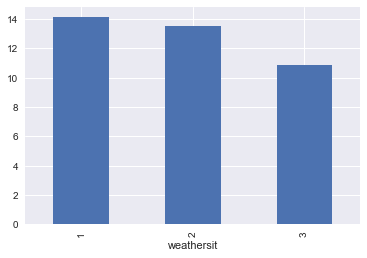

In [33]:
weather_type_grouping = bikeshare.groupby('weathersit')['time_diff'].mean()
weather_type_grouping.plot.bar()
plt.show()

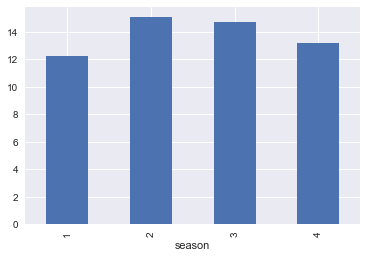

In [34]:
season_grouping = bikeshare.groupby('season')['time_diff'].mean()
season_grouping.plot.bar()
plt.show()

(0, 35)

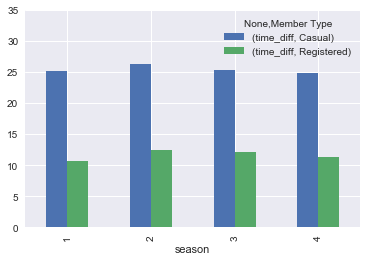

In [38]:
bikeshare_season_type = bikeshare.copy()
bikeshare_season_type = bikeshare_season_type[['Member Type','season','time_diff']]
bikeshare_season_type_piv = bikeshare_season_type.pivot_table(index='season', 
                                                              columns='Member Type', aggfunc='mean')
bikeshare_season_type_piv.plot.bar()
plt.ylim([0,35])



## Ride Times and Weather
Scatter plots and line plots
Seasons


## Ride Times and Calendar
Weekday
Workday
Holiday
Month

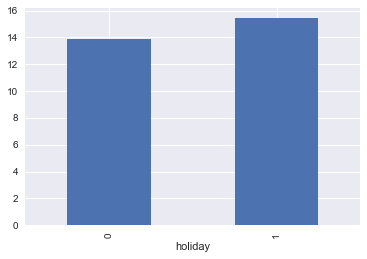

In [36]:
holiday_grouping = bikeshare.groupby('holiday')['time_diff'].mean()
holiday_grouping.plot.bar()
plt.show()

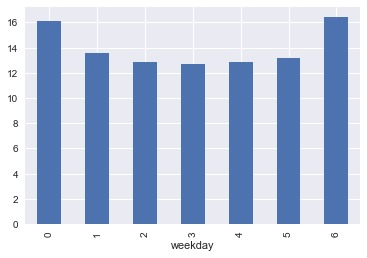

In [37]:
weekday_grouping = bikeshare.groupby('weekday')['time_diff'].mean()
weekday_grouping.plot.bar()
plt.show()

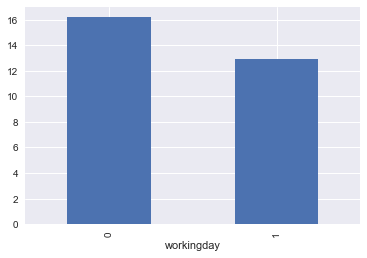

In [39]:
workday_grouping = bikeshare.groupby('workingday')['time_diff'].mean()
workday_grouping.plot.bar()
plt.show()

## Hypothesis to Investigate Further